# 使用 PCA 降噪

## 手写识别例子

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

### 加入噪声

In [3]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [4]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [5]:
example_digits.shape

(100, 64)

In [6]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest',
                 clim=(0, 16))
    plt.show()

### 绘制加入噪声后的图像

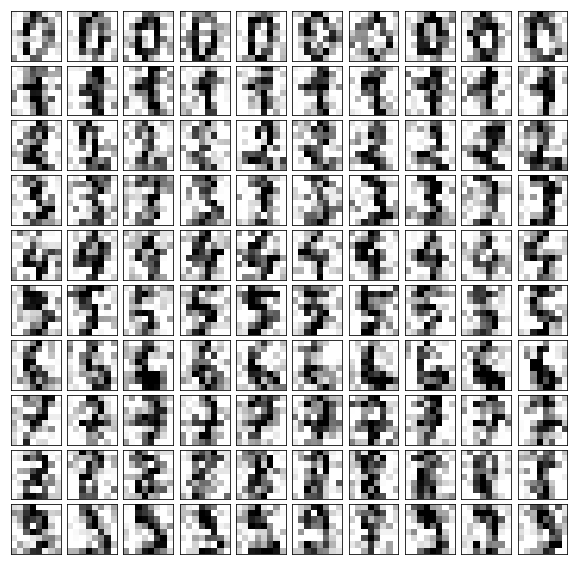

In [7]:
plot_digits(example_digits)

### 使用 PCA 降噪

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(0.5)
pca.fit(noisy_digits)
noisy_digits_reduction = pca.transform(noisy_digits)
noisy_digits_reduction = pca.inverse_transform(noisy_digits_reduction)

In [10]:
example_digits_reduction = noisy_digits_reduction[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits_reduction[y==num,:][:10]
    example_digits_reduction = np.vstack([example_digits_reduction, X_num])

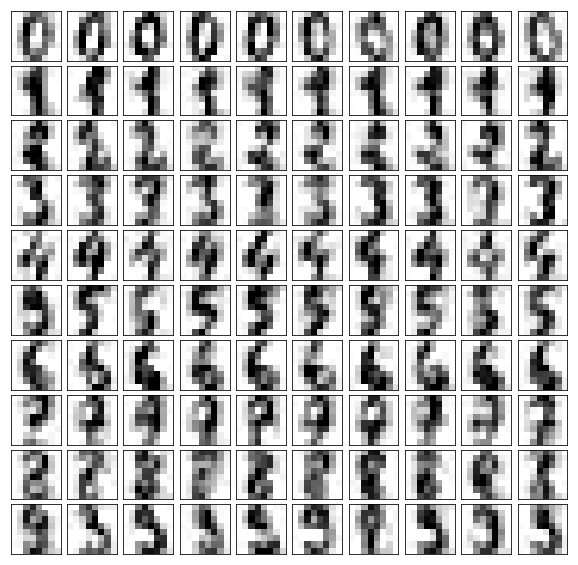

In [11]:
plot_digits(example_digits_reduction)

### 原本信息

In [12]:
example_digits_original = X[y==0,:][:10]
for num in range(1, 10):
    X_num = X[y==num,:][:10]
    example_digits_original = np.vstack([example_digits_original, X_num])

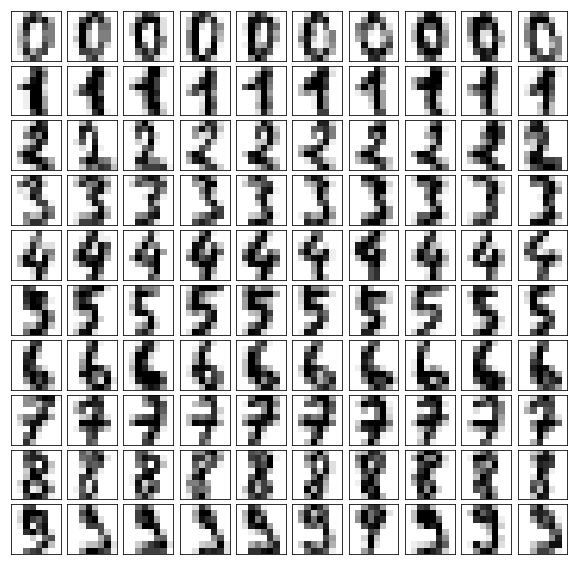

In [13]:
plot_digits(example_digits_original)